In [1]:

# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pylab


# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)


# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)



c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


## Distribution of sentiment scores of each sentence of each review per each listings

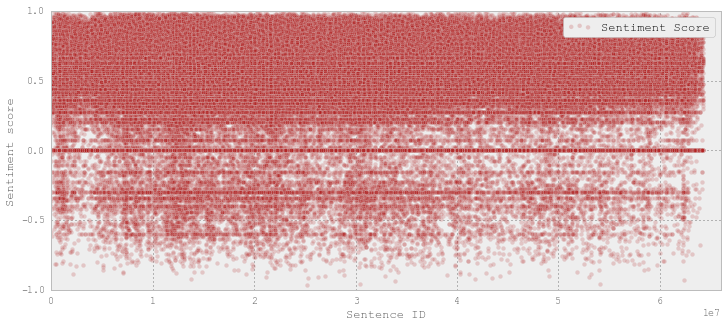

In [2]:
file = pd.read_csv('C:/Python27/output_improved_AMS.csv')
d=file[['Review ID','Sentiment score']].plot(kind='scatter', x='Review ID', y='Sentiment score', color='FireBrick', 
                     label='Sentiment Score', alpha=0.2, figsize=(12,5))
plt.axis([0,65999999,-1.0,1.0])
d.set_xlabel("Sentence ID")
plt.show()

# Sorted array of sentiment scores a) and these scores rounded by 1 in b)

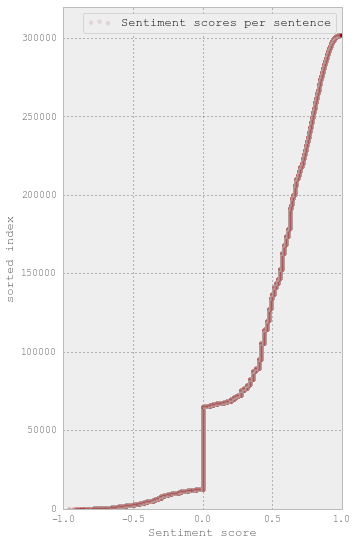

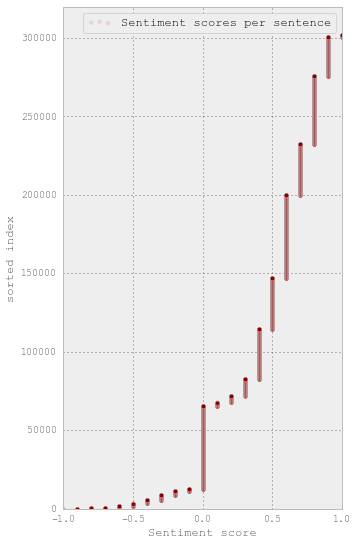

In [3]:
# Sentiment scores in another form of visualizing 

ak=file[['Sentiment score']].sort_values('Sentiment score', axis=0, ascending=True)
ak.reset_index(level=0, inplace=True)
ak['index']=ak.index
i=ak.plot(kind='scatter', y='index', x='Sentiment score', color='DarkRed', 
                     label='Sentiment scores per sentence', alpha=0.1, figsize=(5,9))
plt.axis([-1, 1, 0, 320000])
i.set_ylabel("sorted index")
plt.show()


# Sentiment scores in another form of visualizing 

ak=file[['Sentiment score']].sort_values('Sentiment score', axis=0, ascending=True).round(1)
ak.reset_index(level=0, inplace=True)
ak['index']=ak.index
ii=ak.plot(kind='scatter', y='index', x='Sentiment score', color='DarkRed', 
                     label='Sentiment scores per sentence', alpha=0.1, figsize=(5,9))
ii.set_ylabel("sorted index")
plt.axis([-1, 1, 0, 320000])
plt.show()

# Normalized frequencies of sentiment scores rounded by 1

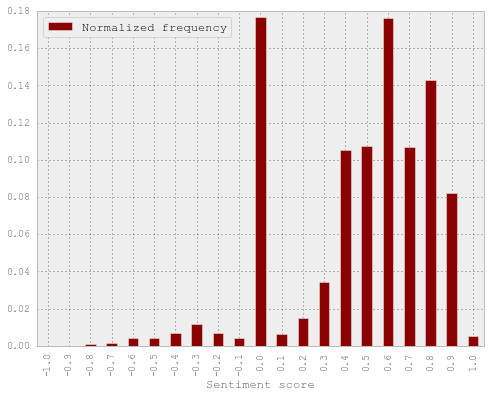

In [7]:
# Normalized frequency of sentiment scores
aa=ak[['Sentiment score']].round(1)
ab=aa['Sentiment score'].value_counts(normalize=True, sort=False)
af=pd.DataFrame({'Sentiment score':ab.index, 'Normalized frequency':ab.values})
h=af.sort_values('Sentiment score', axis=0, ascending=True)
h.plot(kind='bar',x='Sentiment score', y='Normalized frequency', figsize=(8,6), color='DarkRed') 


# Distribution of sentiment scores per each feature 
## Accuracy

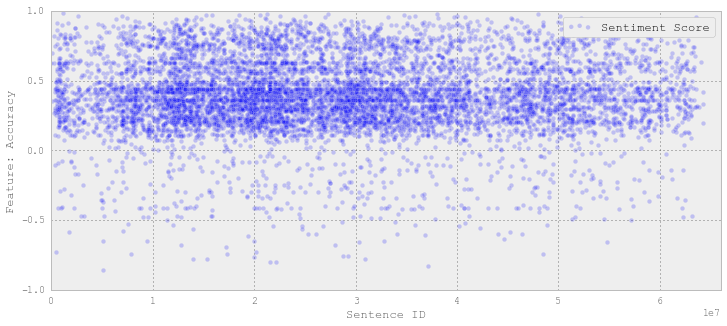

In [8]:
acc=file[file['Feature: Accuracy']!=0]
acc[['Review ID','Feature: Accuracy']].plot(kind='scatter', x='Review ID', y='Feature: Accuracy', color='Blue', 
                     label='Sentiment Score', alpha=0.2, figsize=(12,5)).set_xlabel("Sentence ID")
plt.axis([0,65999999,-1.0,1.0])
plt.show()
acr=acc.round(1)

## Check-in

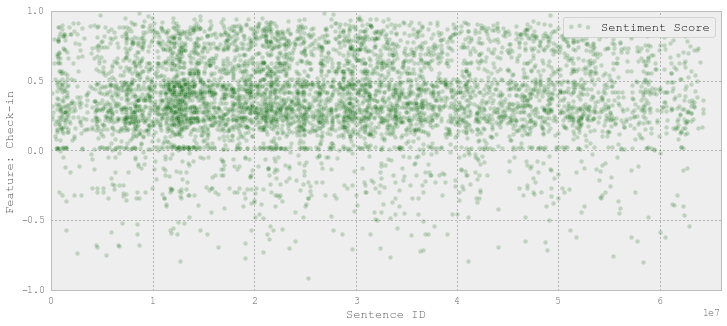

In [9]:
chk=file[file['Feature: Check-in']!=0]
chk[['Review ID','Feature: Check-in']].plot(kind='scatter', x='Review ID', y='Feature: Check-in', color='DarkGreen', 
                     label='Sentiment Score', alpha=0.2, figsize=(12,5)).set_xlabel("Sentence ID")
plt.axis([0,65999999,-1.0,1.0])
plt.show()
chkr=chk.round(1)

## Cleanliness

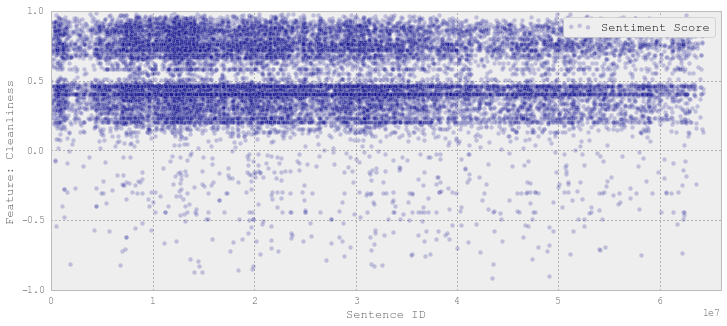

In [10]:
cle=file[file['Feature: Cleanliness']!=0]
cle[['Review ID','Feature: Cleanliness']].plot(kind='scatter', x='Review ID', y='Feature: Cleanliness', color='DarkBlue', 
                     label='Sentiment Score', alpha=0.2, figsize=(12,5)).set_xlabel("Sentence ID")
plt.axis([0,65999999,-1.0,1.0])
plt.show()
cler=cle.round(1)

## Communication

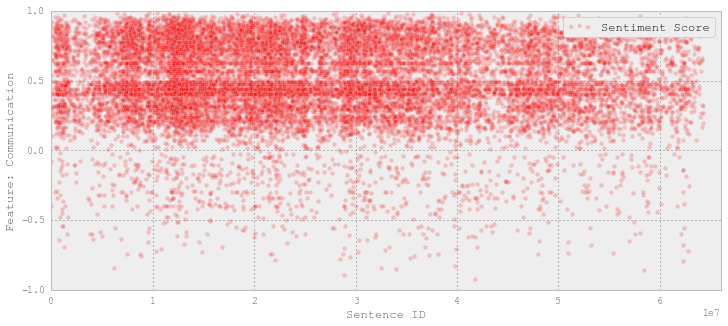

In [11]:
com=file[file['Feature: Communication']!=0]
com[['Review ID','Feature: Communication']].plot(kind='scatter', x='Review ID', y='Feature: Communication', color='Red', 
                     label='Sentiment Score', alpha=0.2, figsize=(12,5)).set_xlabel("Sentence ID")
plt.axis([0,65999999,-1.0,1.0])
plt.show()
comr=com.round(1)

## Location 

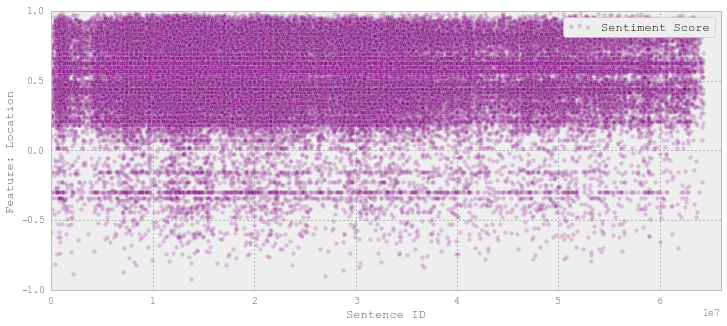

In [12]:
loc=file[file['Feature: Location']!=0]
loc[['Review ID','Feature: Location']].plot(kind='scatter', x='Review ID', y='Feature: Location', color='Purple', 
                     label='Sentiment Score', alpha=0.2, figsize=(12,5)).set_xlabel("Sentence ID")
plt.axis([0,65999999,-1.0,1.0])
plt.show()
locr=loc.round(1)

## Value

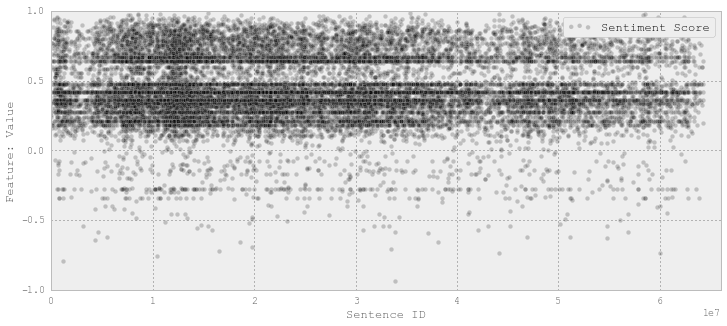

In [13]:
val=file[file['Feature: Value']!=0]
val[['Review ID','Feature: Value']].plot(kind='scatter', x='Review ID', y='Feature: Value', color='Black', 
                     label='Sentiment Score', alpha=0.2, figsize=(12,5)).set_xlabel("Sentence ID")
plt.axis([0,65999999,-1.0,1.0])
plt.show()
valr=val.round(1)

# Normalized frequencies of sentiment scores per feature (compared)

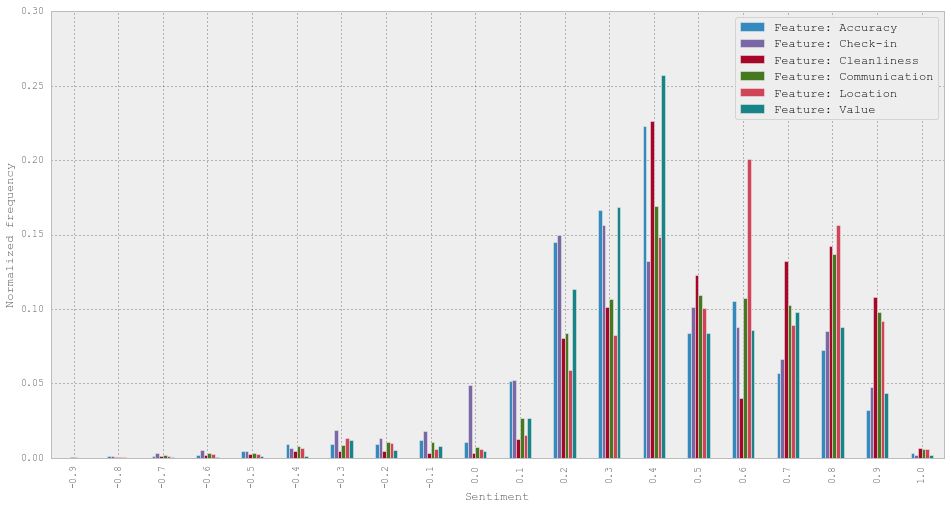

In [14]:
# Normalized frequency of sentiment scores for each feature and their comparison with each other

f1=acr['Feature: Accuracy'].value_counts(normalize=True, sort=False)
f2=chkr['Feature: Check-in'].value_counts(normalize=True, sort=False)
f3=cler['Feature: Cleanliness'].value_counts(normalize=True, sort=False)
f4=comr['Feature: Communication'].value_counts(normalize=True, sort=False)
f5=locr['Feature: Location'].value_counts(normalize=True, sort=False)
f6=valr['Feature: Value'].value_counts(normalize=True, sort=False)
frames=[f1,f2,f3,f4,f5,f6]
result=pd.concat(frames,axis=1)
result['Sentiment']=result.index
result.sort_values('Sentiment', axis=0, ascending=True)
result.plot.bar(x='Sentiment', y=['Feature: Accuracy','Feature: Check-in',
                                  'Feature: Cleanliness','Feature: Communication','Feature: Location',
                                  'Feature: Value'], figsize=(16,8)).set_ylabel("Normalized frequency");

## Mean and stardard deviation of sentiment scores per sentence

In [18]:
# Mean and standard deviation of this distribution
std=ak['Sentiment score'].std()
std.round(3)
m=ak['Sentiment score'].mean()
print 'Mean: ', m.round(3)
print 'Standard deviation: ', std.round(3)


Mean:  0.47
Standard deviation:  0.336


## Number of sentences with negative sentiment

In [21]:
# Select the rows with negative sentiment
negative_sentences = file[file['Sentiment score'] < 0]
neg=negative_sentences['Listing ID'].value_counts().sum()
print 'Number of sentences with negative sentiment: ',neg

Number of sentences with negative sentiment:  12798


## Number of sentences with positive sentiment

In [22]:
# Select the rows with positive sentiment
pos_sentences = file[file['Sentiment score'] > 0]
pos=pos_sentences['Listing ID'].value_counts().sum()
print 'Number of sentences with positive sentiment: ',pos

Number of sentences with positive sentiment:  236904


## Comparison of negative/positive sentences

In [26]:
print 'The number of positive sentences is ', pos/neg, ' times higher than the number of negative ones.'

The number of positive sentences is  18  times higher than the number of negative ones.
